In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
nycdata = pd.read_csv('NYC data.csv')
nycdata
#reading in data file

,DATE_OF_INTEREST,Cases,Hospitalizations,Deaths
0,3/2/2020,1,12,0
1,3/3/2020,4,10,0
2,3/4/2020,10,13,0
3,3/5/2020,2,17,0
4,3/6/2020,8,17,0
5,3/7/2020,14,9,0
6,3/8/2020,20,15,0
7,3/9/2020,54,36,0
8,3/10/2020,75,48,0
9,3/11/2020,157,72,1


In [98]:
cases = nycdata['Cases'] #turning cases data into readable array
cases_fit = cases[:16] #chosing section to fit the curve to
hospital = nycdata['Hospitalizations']
deaths = nycdata['Deaths']
x = np.linspace(1,43,43) #creating an x array for the data plot
x_fit = np.linspace(1,16,16) #x array for the fitted section

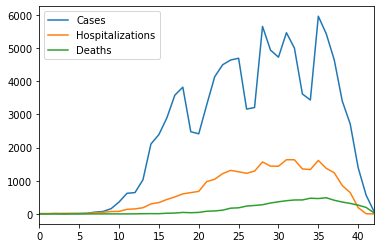

In [99]:
n = nycdata.plot() #plot of full data

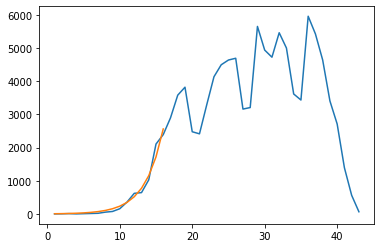

In [100]:
import scipy.optimize
def func(x_fit,a,b):
    return a*(b**x_fit) #exponential function to fit the curve to
popt,pcov = scipy.optimize.curve_fit(func,x_fit,cases_fit)
a_fit = popt[0] #a value
b_fit = popt[1] #b value
plt.plot(x,cases)
plt.plot(x_fit,func(x_fit,a_fit,b_fit))

In [101]:
xx = np.linspace(1,21,21) #looking at fit on larger area of true data
y = a_fit*(b_fit**xx)

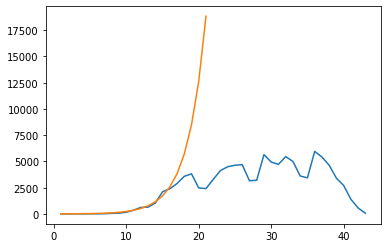

In [102]:
plt.plot(x,cases)
plt.plot(xx,func(xx,a_fit,b_fit))

In [172]:
#It it clear from the projection of the early exponential fit that social distancing practices were implemented to decrease 
#the cases numbers and flatten that curve. Without distancing, the cases would have kept skyrocketing exponentially. 

In [ ]:
#2:

In [160]:
def rhs(z,t,p):
    S,E,I,R = z #solution vector of state variables
    rep, tinc, tinf = p #parameter vector
    f = [((-rep/tinf)*I*S),((rep/tinf)*I*S - (E/tinf)),((E/tinc)-(I/tinf)),(I/tinf)]
    return f
 #f is a function of our three differentials  

In [216]:
from scipy.integrate import odeint
import numpy as np
#parameters:
rep = 3.0
tinc = 5.2
tinf = 2.9
#initial conditions:
I0 = 2
S0 = 500
E0 = 2
R0=2.0
z0 = [S0,E0,I0,R0]
p = [rep,tinc,tinf]

In [217]:
t = np.linspace(0,30,100)
sol = odeint(rhs, z0, t, args=(p,))

Text(0.5, 0, 'time')

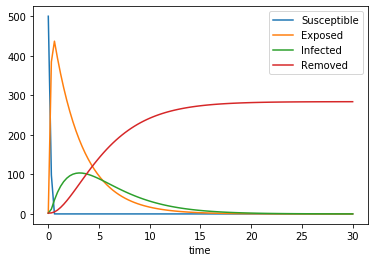

In [218]:
plt.plot(t, sol[:, 0], label = 'Susceptible')
plt.plot(t, sol[:, 1], label = 'Exposed')
plt.plot(t, sol[:, 2], label = 'Infected')
plt.plot(t, sol[:, 3], label = 'Removed')
plt.legend()
plt.xlabel('time')

In [173]:
#This is one example with initial parameters of a 3.0 reproduction rate per day, a 5.2 day incubation period and a 2.9 day 
#infectious period, which were taken from Wuhan in the Kucharski et al paper. Additionally, the initial infectious number
#was set to 2 people, 20 were exposed to those 2 people, and the rest of the susceptible peopulation was 500. What happens
#if any of these conidtions are changed?

Text(0.5, 0, 'time')

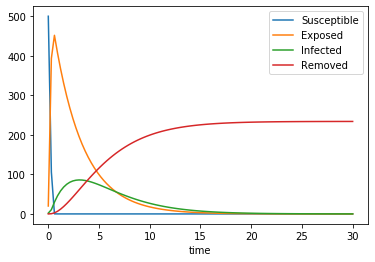

In [183]:
#Changing the incubation:
#raising the incubation time, as was suggested by another paper
from scipy.integrate import odeint
import numpy as np
#parameters:
rep = 3.0
tinc = 6.5
tinf = 2.9
#initial conditions:
I0 = 2
S0 = 500
E0 = 20
R0=0
z0 = [S0,E0,I0,R0]
p = [rep,tinc,tinf]
t = np.linspace(0,30,100)
sol = odeint(rhs, z0, t, args=(p,))
plt.plot(t, sol[:, 0], label = 'Susceptible')
plt.plot(t, sol[:, 1], label = 'Exposed')
plt.plot(t, sol[:, 2], label = 'Infected')
plt.plot(t, sol[:, 3], label = 'Removed')
plt.legend()
plt.xlabel('time')

In [184]:
#raising the incubation period, led to a drop in the height of the infected and removed curves

Text(0.5, 0, 'time')

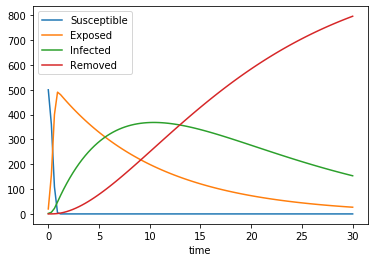

In [185]:
#Changing the infectious:
#raising the infectious time, as was suggested by another paper
from scipy.integrate import odeint
import numpy as np
#parameters:
rep = 3.0
tinc = 5.2
tinf = 10.0
#initial conditions:
I0 = 2
S0 = 500
E0 = 20
R0=0
z0 = [S0,E0,I0,R0]
p = [rep,tinc,tinf]
t = np.linspace(0,30,100)
sol = odeint(rhs, z0, t, args=(p,))
plt.plot(t, sol[:, 0], label = 'Susceptible')
plt.plot(t, sol[:, 1], label = 'Exposed')
plt.plot(t, sol[:, 2], label = 'Infected')
plt.plot(t, sol[:, 3], label = 'Removed')
plt.legend()
plt.xlabel('time')

In [186]:
#raising the time of being infectious led to a much more gradual drop off in the number of exposed people, which dramatically
#increased the number of people who got infected (the green curve) 

Text(0.5, 0, 'time')

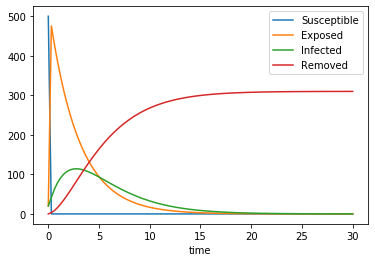

In [187]:
#Changing the number of intial infections:
from scipy.integrate import odeint
import numpy as np
#parameters:
rep = 3.0
tinc = 5.2
tinf = 2.9
#initial conditions:
I0 = 20
S0 = 500
E0 = 20
R0=0
z0 = [S0,E0,I0,R0]
p = [rep,tinc,tinf]
t = np.linspace(0,30,100)
sol = odeint(rhs, z0, t, args=(p,))
plt.plot(t, sol[:, 0], label = 'Susceptible')
plt.plot(t, sol[:, 1], label = 'Exposed')
plt.plot(t, sol[:, 2], label = 'Infected')
plt.plot(t, sol[:, 3], label = 'Removed')
plt.legend()
plt.xlabel('time')

In [188]:
#raising the number of initial infections seems to have no effect

Text(0.5, 0, 'time')

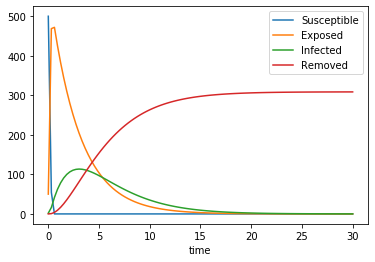

In [221]:
#raising the original exposed population
from scipy.integrate import odeint
import numpy as np
#parameters:
rep = 3.0
tinc = 5.2
tinf = 2.9
#initial conditions:
I0 = 2
S0 = 500
E0 = 50
R0=0
z0 = [S0,E0,I0,R0]
p = [rep,tinc,tinf]
t = np.linspace(0,30,100)
sol = odeint(rhs, z0, t, args=(p,))
plt.plot(t, sol[:, 0], label = 'Susceptible')
plt.plot(t, sol[:, 1], label = 'Exposed')
plt.plot(t, sol[:, 2], label = 'Infected')
plt.plot(t, sol[:, 3], label = 'Removed')
plt.legend()
plt.xlabel('time')

In [194]:
#raising the number of people initially exposed increases the peak of the exposed populatiom as well as the value when the removed
#curve stabilizes

Text(0.5, 0, 'time')

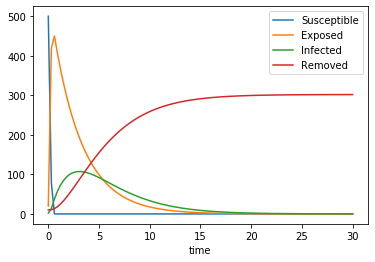

In [222]:
#increasing the reproduction number
from scipy.integrate import odeint
import numpy as np
#parameters:
rep = 3.0
tinc = 5.2
tinf = 2.9
#initial conditions:
I0 = 2
S0 = 500
E0 = 20
R0=10.0
z0 = [S0,E0,I0,R0]
p = [rep,tinc,tinf]
t = np.linspace(0,30,100)
sol = odeint(rhs, z0, t, args=(p,))
plt.plot(t, sol[:, 0], label = 'Susceptible')
plt.plot(t, sol[:, 1], label = 'Exposed')
plt.plot(t, sol[:, 2], label = 'Infected')
plt.plot(t, sol[:, 3], label = 'Removed')
plt.legend()
plt.xlabel('time')

In [200]:
#increasing the reproduction number, of how many people one person can effect, did not seem to change the plot

In [146]:
#3:

In [150]:
import random
#Define the city box:
xmax = 60
ymax = 30
N = 200 #population
def start():
    for i in range(N):
        x = random.randrange(1,xmax,1)
        y = random.randrange(1,ymax,1)
    return x,y

In [ ]:
#need: give balls a class? speed, type/color, etc
class Ball:
    def __init__(self,width,height,)